In [1]:
# important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
bank_df = pd.read_csv('banking_data_clean.csv')
bank_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,0,1,0,0,0,1,0,0


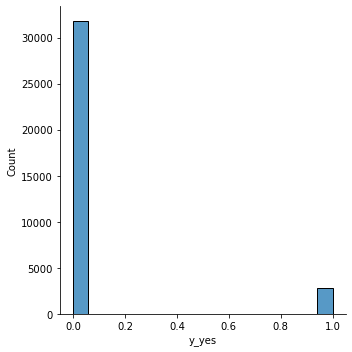

In [42]:
sns.displot(x='y_yes', data=bank_df)

In [16]:
# lets try model building using upsampling
from imblearn import over_sampling
from imblearn import under_sampling

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score,confusion_matrix
from sklearn.model_selection import cross_val_score

In [9]:
X = bank_df.drop('y_yes', axis=1)
y=bank_df.y_yes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
over = over_sampling.RandomOverSampler(random_state=42)
X_over, y_over = over.fit_resample(X_train,y_train)

In [27]:
X_test, y_test = over.

(10391, 51)

In [19]:
std = StandardScaler()
X_train_std = std.fit_transform(X_over)
X_test_std = std.transform(X_test)

In [28]:
lr = LogisticRegression()
lr_m = lr.fit(X_train_std, y_over)
lr_pred = lr_m.predict(X_test_std)

print(confusion_matrix(lr_pred, y_test))
print(accuracy_score(lr_pred, y_test))
print(cross_val_score(lr,X_train_std,y_over,cv=10,scoring='accuracy').mean())

[[8181   82]
 [1369  759]]
0.8603599268597825
0.8765111917587843


For k 1 accuracy is 0.975819078141534
For k 2 accuracy is 0.975819078141534
For k 3 accuracy is 0.9590991739085414
For k 4 accuracy is 0.9587620801038487
For k 5 accuracy is 0.9451659683655714
For k 6 accuracy is 0.9446041100007324
For k 7 accuracy is 0.9326484224456448
For k 8 accuracy is 0.9308730708327333
For k 9 accuracy is 0.922355898686992
For k 10 accuracy is 0.9190523915234076
For k 11 accuracy is 0.9117261952566034
For k 12 accuracy is 0.9081304421395038
For k 13 accuracy is 0.9008043216377372
For k 14 accuracy is 0.8964220213606895
For k 15 accuracy is 0.8907139794070627
For k 16 accuracy is 0.8860171431024773
For k 17 accuracy is 0.8812752922636321
For k 18 accuracy is 0.8777695177050265
For k 19 accuracy is 0.8741738251999566
For k 20 accuracy is 0.871072610686406
For k 21 accuracy is 0.8681287096456469
For k 22 accuracy is 0.8675669472498553
For k 23 accuracy is 0.8655443490646807
For k 24 accuracy is 0.8667579887918254
For k 25 accuracy is 0.8651174989456033
For k 26 accu

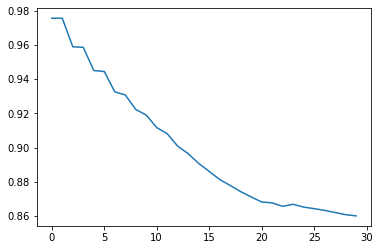

In [29]:
lst=[]
for k in range(1,31):
    alg = KNeighborsClassifier(n_neighbors=k)
    #model = alg.fit(X_train_std, y_train)
    #pred = model.predict(X_test)
    score = cross_val_score(alg,X_train_std, y_over,cv=10,scoring='accuracy').mean()
    lst.append(score)
    #print(confusion_matrix(pred, y_test))
    print('For k {} accuracy is {}'.format(k, score))
    
    #print(cross_val_score(alg,X_train_std,y_train,cv=10,scoring='accuracy').mean())
    
plt.plot(lst)

In [38]:
rfc = RandomForestClassifier()
rf_m = rfc.fit(X_train_std, y_over)
rf_pred= rf_m.predict(X_test_std)
print(confusion_matrix(rf_pred, y_test))
print(accuracy_score(rf_pred, y_test))
print(cross_val_score(rfc,X_train_std,y_over,cv=10,scoring='accuracy').mean())

[[9253  360]
 [ 297  481]]
0.9367722067173515
0.9825160457721847


In [39]:
print(precision_score(rf_pred, y_test))
print(recall_score(rf_pred, y_test))
print(f1_score(rf_pred, y_test))

0.5719381688466112
0.6182519280205655
0.5941939468807906


In [40]:
gb = GradientBoostingClassifier()
gb_m = gb.fit(X_train_std, y_over)
gb_pred= rf_m.predict(X_test_std)
print(confusion_matrix(gb_pred, y_test))
print(accuracy_score(gb_pred, y_test))
print(cross_val_score(gb,X_train_std,y_over,cv=10,scoring='accuracy').mean())

[[9253  360]
 [ 297  481]]
0.9367722067173515
0.8914781405239405


In [47]:
print(precision_score(gb_pred, y_test))
print(recall_score(gb_pred, y_test))
print(f1_score(gb_pred, y_test))

0.5719381688466112
0.6182519280205655
0.5941939468807906


### Now lets try hyperparameter tuning for Gradient boosting and Random forest

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
print(param_grid)

{'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]}


In [ ]:
gb_params = {loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,

In [53]:
rf_random = RandomizedSearchCV(rfc, param_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [54]:
rf_random.fit(X_train_std, y_over)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   random_state=42, verbose=2)

In [55]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 100,
 'bootstrap': True}

In [56]:
rf_random_pred = rf_random.predict(X_test_std)
print(accuracy_score(rf_random_pred, y_test))
print(precision_score(rf_random_pred, y_test))
print(recall_score(rf_random_pred, y_test))
print(f1_score(rf_random_pred, y_test))

0.9078048311038399
0.7895362663495838
0.45951557093425605
0.5809273840769903


In [61]:
rf_grid = GridSearchCV(rfc, param_grid, cv = 3, verbose=2, n_jobs = -1)
rf_grid.fit(X_train_std, y_over)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [62]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [63]:
rf_grid_pred = rf_grid.predict(X_test_std)
print(accuracy_score(rf_grid_pred, y_test))
print(precision_score(rf_grid_pred, y_test))
print(recall_score(rf_grid_pred, y_test))
print(f1_score(rf_grid_pred, y_test))

0.9091521508998172
0.7954815695600476
0.46426092990978485
0.5863277826468011


In [66]:
gb_param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [67]:
gb_random = RandomizedSearchCV(gb, gb_param_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
gb_random.fit(X_train_std, y_over)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   random_state=42, verbose=2)

In [68]:
gb_random_pred= gb_random.predict(X_test_std)
print(accuracy_score(gb_random_pred, y_test))
print(precision_score(gb_random_pred, y_test))
print(recall_score(gb_random_pred, y_test))
print(f1_score(gb_random_pred, y_test))

0.9352324126648061
0.41379310344827586
0.6590909090909091
0.5084002921840759


In [73]:
gb_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 3,
 'max_depth': 100}

In [76]:
gb = GradientBoostingClassifier(n_estimators=1000, min_samples_split=8,min_samples_leaf=4, max_features=3,max_depth=100)
gb_m = gb.fit(X_train_std, y_over)
gb_pred= rf_m.predict(X_test_std)
print(confusion_matrix(gb_pred, y_test))
print(accuracy_score(gb_pred, y_test))
#print(cross_val_score(gb,X_train_std,y_over,cv=10,scoring='accuracy').mean())

[[9253  360]
 [ 297  481]]
0.9367722067173515


In [77]:
print(precision_score(gb_pred, y_test))
print(recall_score(gb_pred, y_test))
print(f1_score(gb_pred, y_test))

0.5719381688466112
0.6182519280205655
0.5941939468807906


### Above model with given parameters is the best fit model for the given problem